In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk

In [3]:
from nltk.corpus import stopwords

In [4]:
df=pd.read_csv('SMSSpamCollection-Copy1',sep='\t',names=['label','message'])

In [5]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [7]:
df['length']=df['message'].apply(len)

In [8]:
df

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


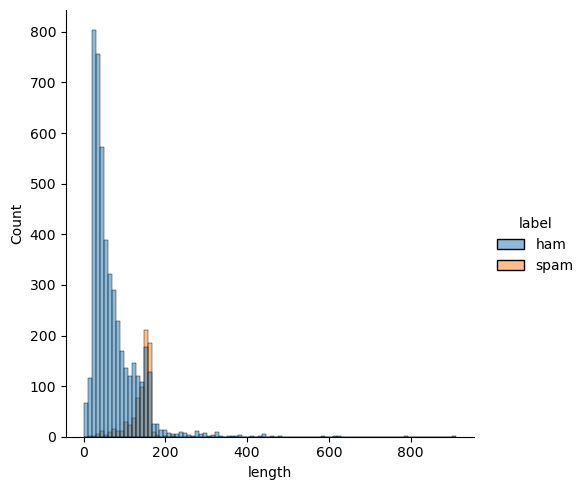

In [9]:
sns.displot(data=df,x='length',hue='label',kind='hist')

In [10]:
df.describe()

,length
count,5572.000000
mean,80.489950
std,59.942907
min,2.000000
25%,36.000000
50%,62.000000
75%,122.000000
max,910.000000


In [11]:
df[df['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [12]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
from nltk.corpus import stopwords as sw

In [14]:
def textprocess(text):
    text=[i for i in text if i not in string.punctuation]
    text=''.join(text)
    return [i for i in text.split() if i.lower() not in sw.words('english')]

In [35]:
df['message'].head().apply(textprocess)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [41]:
bow=CountVectorizer(analyzer=textprocess).fit_transform(df['message'])


In [43]:
tfidf=TfidfTransformer().fit_transform(bow)

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
spam_model_detection=MultinomialNB().fit(tfidf,df['label'])

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
pipe=Pipeline([('bow',CountVectorizer(analyzer=textprocess)),
              ('tfidf',TfidfTransformer()),
              ('classification',MultinomialNB())])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['message'],df['label'], test_size=0.33, random_state=42)

In [52]:
pipe.fit(X_train,y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function textprocess at 0x000001E7E6F03740>)),
                ('tfidf', TfidfTransformer()),
                ('classification', MultinomialNB())])

In [53]:
prediction=pipe.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1593
        spam       1.00      0.74      0.85       246

    accuracy                           0.96      1839
   macro avg       0.98      0.87      0.91      1839
weighted avg       0.97      0.96      0.96      1839

[[1593    0]
 [  65  181]]


model is 96% accurate

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the bag-of-words approach, where each unique word in a text will be represented by one number.

In machine learning, vectorization refers to the process of converting data into arrays of numerical values, known as vectors.

TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. 